## Gradient Descent

Gradient descent is used to find a local minima/maxima of the given function. To find such points, we start at any arbitrary point and take small steps in the direction of its gradient. The gradient (aka derivative) is the slope of the tangent at that point. In order to take small steps, we multiply the gradient with a small learning rate and continue till we reach a very low gradient point.

Since GD in context of ML is about finding a point where the loss is minimum, we generally see it as a tool for finding minima vs maxima. Any maxima can be turned into minima by just multiplying the function by -1.

$loss = loss - R_l * gradient$

### Single Variable Function

Consider the problem of finding the minimum value of y for $y = x^2$

The derivative of y:

$\frac{dy}{dx} = \frac{d}{dx} x^2 = 2x$

So on every step, we will subtract $lr * 2x$ from the current value of y will we bring down the value of y to under 0.001.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return x**2

def dy_dx(x):
    return 2 * x

val_threshold = 0.001

cur_x = 25
lr = 0.01

readings = []

i = 0
while y(cur_x) > val_threshold:
    i += 1
    cur_x = cur_x - lr * dy_dx(cur_x)
    
    if i % 25 == 0:
        readings.append((cur_x, y(cur_x)))


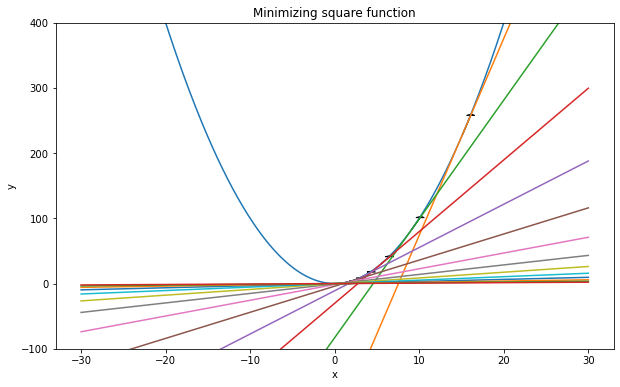

In [3]:
plt.figure(figsize=(10, 6))

x = np.linspace(-30, 30, 400)
plt.plot(x, y(x), label='y = x^2')

# Plot the tangents with arrows
for x0, y0 in readings:
    tangent = dy_dx(x0) * (x - x0) + y0
    plt.plot(x, tangent, label=f'Tangent at x={x0:.2f}')
    
    # Calculate a point on the tangent for the arrow
    arrow_x = x0 + 1  # Adjust this value as needed
    arrow_y = dy_dx(x0) * (arrow_x - x0) + y0
    
    # Adding an arrow
    plt.arrow(x0, y0, arrow_x - x0, arrow_y - y0, head_width=1, head_length=2, fc='k', ec='k')

# Adding labels and legend
plt.ylim(-100, 400)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimizing square function')

# Show the plot
plt.show()

## GD with PyTorch autograd

PyTorch can compute gradients on the params that contribute to the loss automatically. We can use the same magic to implement the logic above.

In [4]:
import torch

X = torch.tensor([25.0], requires_grad=True)
y = X**2

learning_rate = 0.01

i = 0

# Perform gradient descent
while y > 0.001:
    y = X ** 2

    y.backward()

    with torch.no_grad():
        X -= learning_rate * X.grad

    X.grad.zero_()

    i += 1
    
    if i % 10 == 0:
        print(f"Iteration {i+1}: X = {X.item()}, y = {y.item()}")

Iteration 11: X = 20.426822662353516, y = 434.4596862792969
Iteration 21: X = 16.690200805664062, y = 290.0487365722656
Iteration 31: X = 13.63711166381836, y = 193.63890075683594
Iteration 41: X = 11.142513275146484, y = 129.27488708496094
Iteration 51: X = 9.10424518585205, y = 86.30494689941406
Iteration 61: X = 7.438830852508545, y = 57.61787414550781
Iteration 71: X = 6.078066825866699, y = 38.466156005859375
Iteration 81: X = 4.966223239898682, y = 25.68031120300293
Iteration 91: X = 4.057765483856201, y = 17.144376754760742
Iteration 101: X = 3.3154900074005127, y = 11.445723533630371
Iteration 111: X = 2.708996534347534, y = 7.641256332397461
Iteration 121: X = 2.2134478092193604, y = 5.101365566253662
Iteration 131: X = 1.808548092842102, y = 3.405712366104126
Iteration 141: X = 1.4777154922485352, y = 2.2736806869506836
Iteration 151: X = 1.2074010372161865, y = 1.5179270505905151
Iteration 161: X = 0.9865342378616333, y = 1.013379693031311
Iteration 171: X = 0.80607032775878

## Multiple Parameters

We will now try linear regression with gradient descent for equation:

$y = 3.545 a + 0.534 b + 0.78 c$

We will first create a pretend dataset by sampling some values for a, b and c.

In [76]:
a = torch.rand(size=(1, 1000), dtype=torch.float32)
b = torch.rand(size=(1, 1000), dtype=torch.float32)
c = torch.rand(size=(1, 1000), dtype=torch.float32)

X = torch.cat([a, b, c], axis=0).T
y = 3.545 * X[:, 0] + 0.534 * X[:, 1] + 0.78 * X[:, 2]

# Create and randomly assign the model params
model = torch.rand(3, requires_grad=True, dtype=torch.float32)

In [75]:
from torch import nn

lr = 1e-5
mse_loss = nn.MSELoss(reduction='sum')

loss = 100
i = 0

while loss > .001:
    i += 1
    
    y_pred = X.mm(model.unsqueeze(-1)).squeeze(-1)
    loss = mse_loss(y, y_pred)
    
    if model.grad is not None:
        model.grad.zero_()

    if i % 500 == 0:
        print(f"Loss: {loss}")
        print(f"Model: {model}")

    loss.backward()
    
    with torch.no_grad():
        model -= lr * model.grad


Loss: 81.57689666748047
Model: tensor([2.7413, 1.0969, 1.0120], requires_grad=True)
Loss: 16.366256713867188
Model: tensor([3.1874, 0.7941, 0.8741], requires_grad=True)
Loss: 3.2942142486572266
Model: tensor([3.3857, 0.6540, 0.8178], requires_grad=True)
Loss: 0.665083110332489
Model: tensor([3.4740, 0.5893, 0.7951], requires_grad=True)
Loss: 0.13466760516166687
Model: tensor([3.5133, 0.5595, 0.7859], requires_grad=True)
Loss: 0.02734421379864216
Model: tensor([3.5308, 0.5457, 0.7823], requires_grad=True)
Loss: 0.005566369742155075
Model: tensor([3.5387, 0.5394, 0.7809], requires_grad=True)
Loss: 0.001136379549279809
Model: tensor([3.5422, 0.5365, 0.7803], requires_grad=True)


We can also add an intercept parameter (even though we don't have one in our actual equation)

In [95]:
a = torch.rand(size=(1, 1000), dtype=torch.float32)
b = torch.rand(size=(1, 1000), dtype=torch.float32)
c = torch.rand(size=(1, 1000), dtype=torch.float32)
d = torch.ones(size=(1, 1000), dtype=torch.float32)

X = torch.cat([a, b, c, d], axis=0).T
y = 3.545 * X[:, 0] + 0.534 * X[:, 1] + 0.78 * X[:, 2]

# Create and randomly assign the model params
model = torch.rand(4, requires_grad=True, dtype=torch.float32)

In [96]:
lr = 1e-5
mse_loss = nn.MSELoss(reduction='sum')

loss = 100
i = 0

while loss > .001:
    i += 1
    
    y_pred = X @ model
    loss = mse_loss(y, y_pred)
    
    if model.grad is not None:
        model.grad.zero_()

    if i % 500 == 0:
        print(f"Loss: {loss}")
        print(f"Model: {model}")

    loss.backward()
    
    with torch.no_grad():
        model -= lr * model.grad

Loss: 149.32589721679688
Model: tensor([2.2358, 0.4189, 0.5319, 0.8790], requires_grad=True)
Loss: 45.10629653930664
Model: tensor([2.8588, 0.3731, 0.5871, 0.5478], requires_grad=True)
Loss: 14.942111015319824
Model: tensor([3.1750, 0.3952, 0.6426, 0.3409], requires_grad=True)
Loss: 5.275501251220703
Model: tensor([3.3401, 0.4309, 0.6868, 0.2119], requires_grad=True)
Loss: 1.9360476732254028
Model: tensor([3.4288, 0.4626, 0.7185, 0.1316], requires_grad=True)
Loss: 0.7260541319847107
Model: tensor([3.4778, 0.4865, 0.7402, 0.0817], requires_grad=True)
Loss: 0.2754439115524292
Model: tensor([3.5054, 0.5031, 0.7546, 0.0507], requires_grad=True)
Loss: 0.10513140261173248
Model: tensor([3.5214, 0.5143, 0.7639, 0.0314], requires_grad=True)
Loss: 0.04025062546133995
Model: tensor([3.5308, 0.5215, 0.7699, 0.0195], requires_grad=True)
Loss: 0.01543588750064373
Model: tensor([3.5364, 0.5261, 0.7737, 0.0121], requires_grad=True)
Loss: 0.005924782250076532
Model: tensor([3.5397, 0.5291, 0.7760, 0.0

## PyTorch nn.Linear

Now a more "proper" way to implement Linear learner using PyTorch.

In [101]:
import torch
import torch.nn as nn

# Data generation
a = torch.rand(size=(1, 1000), dtype=torch.float32)
b = torch.rand(size=(1, 1000), dtype=torch.float32)
c = torch.rand(size=(1, 1000), dtype=torch.float32)

X = torch.cat([a, b, c], axis=0).T
y = 3.545 * X[:, 0] + 0.534 * X[:, 1] + 0.78 * X[:, 2]
y = y.unsqueeze(1)  # Make sure y is a 2D tensor as that's the expected output

# Define model, loss function, and optimizer
lr = 1e-5
model = nn.Linear(3, 1)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for t in range(10000):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    if t % 500 == 0:
        print(f"Epoch {t}, Loss: {loss.item()}")
        print(f"Model parameters: {[p.data for p in model.parameters()]}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0, Loss: 6924.5888671875
Model parameters: [tensor([[-0.1886,  0.3243, -0.5551]]), tensor([0.2353])]
Epoch 500, Loss: 213.3023681640625
Model parameters: [tensor([[1.9925, 0.5864, 0.3202]]), tensor([1.0161])]
Epoch 1000, Loss: 64.24366760253906
Model parameters: [tensor([[2.7278, 0.4466, 0.4528]]), tensor([0.6396])]
Epoch 1500, Loss: 21.26104736328125
Model parameters: [tensor([[3.1039, 0.4248, 0.5554]]), tensor([0.4028])]
Epoch 2000, Loss: 7.561553001403809
Model parameters: [tensor([[3.3009, 0.4408, 0.6296]]), tensor([0.2537])]
Epoch 2500, Loss: 2.820848226547241
Model parameters: [tensor([[3.4066, 0.4643, 0.6809]]), tensor([0.1599])]
Epoch 3000, Loss: 1.0829949378967285
Model parameters: [tensor([[3.4649, 0.4851, 0.7155]]), tensor([0.1008])]
Epoch 3500, Loss: 0.4226129651069641
Model parameters: [tensor([[3.4978, 0.5009, 0.7384]]), tensor([0.0635])]
Epoch 4000, Loss: 0.16638922691345215
Model parameters: [tensor([[3.5167, 0.5122, 0.7533]]), tensor([0.0400])]
Epoch 4500, Loss: 